In [1]:
import tensorflow as tf

In [2]:
image_size = (128,128)

In [3]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small-master/test",
    target_size=image_size,
)

Found 372 images belonging to 10 classes.


In [4]:
test_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [5]:
class_names = ['dress','hat','longsleeve','outwear','pants','shirt','shoes','shorts','skirt','t-shirt']

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# The following lines are used for bypassing an error
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img/255)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [7]:
import random

def model_evaluation(model):
    test_loss, test_acc = model.evaluate(test_ds, verbose=2)
    
    random_batch = random.randint(0,test_ds.__len__()-1)
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_ds[random_batch][0])
    
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    true_labels = []
    for i in test_ds[random_batch][1]:
        true_labels.append(list(i).index(1))
    
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], true_labels, test_ds[random_batch][0])
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], true_labels)
    plt.tight_layout()
    plt.show()

Here are the result for different models.

12/12 - 22s - loss: 0.4108 - accuracy: 0.8629 - 22s/epoch - 2s/step
1/1 [==============================] - 8s 8s/step


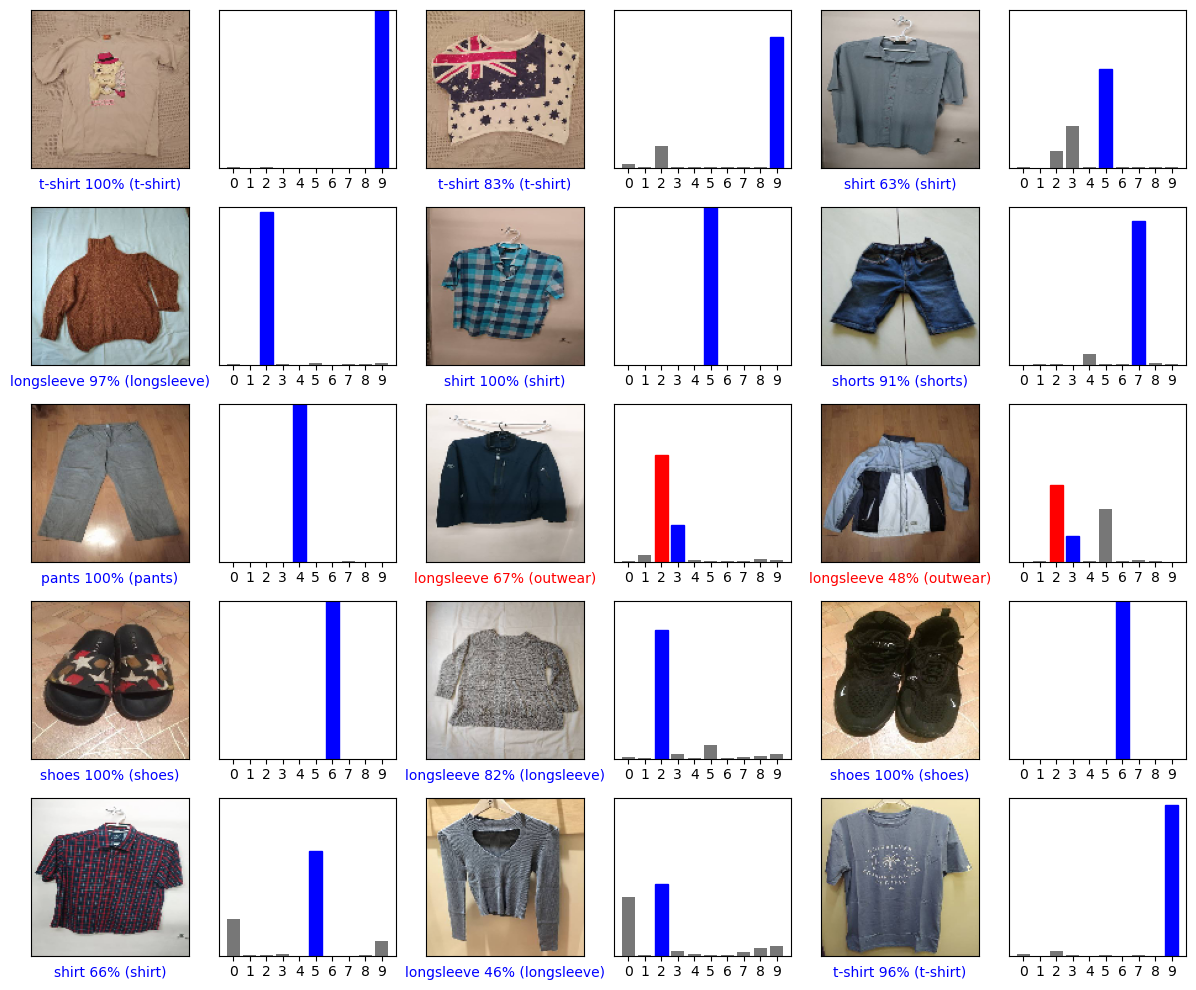

In [8]:
model_0 = tf.keras.models.load_model('EfficientNetV2L_0001_2.h5')

model_evaluation(model_0)

12/12 - 22s - loss: 0.4207 - accuracy: 0.8575 - 22s/epoch - 2s/step
1/1 [==============================] - 8s 8s/step


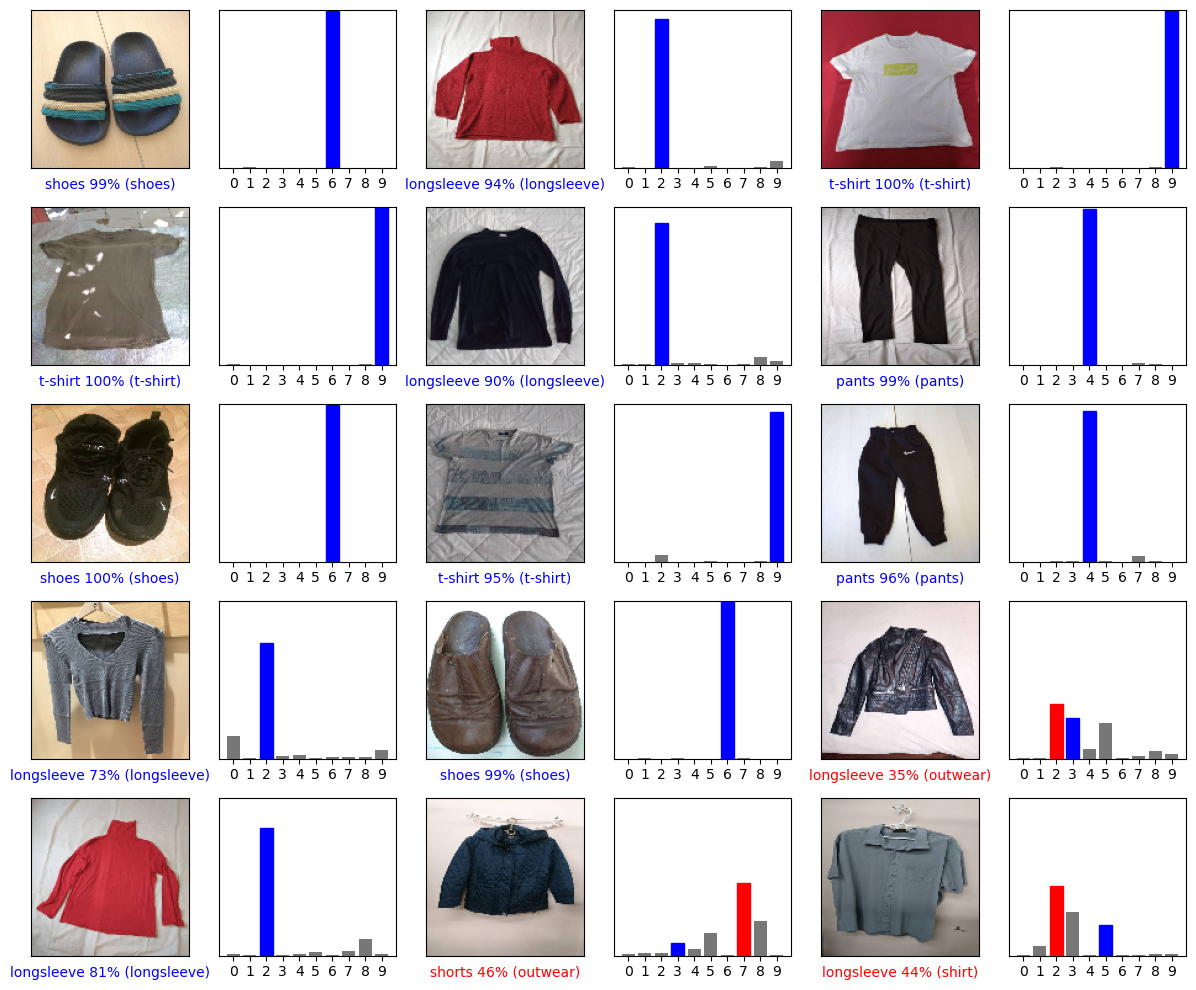

In [9]:
model_1 = tf.keras.models.load_model('EfficientNetV2L_0001_3.h5')

model_evaluation(model_1)

12/12 - 25s - loss: 0.4871 - accuracy: 0.8710 - 25s/epoch - 2s/step
1/1 [==============================] - 8s 8s/step


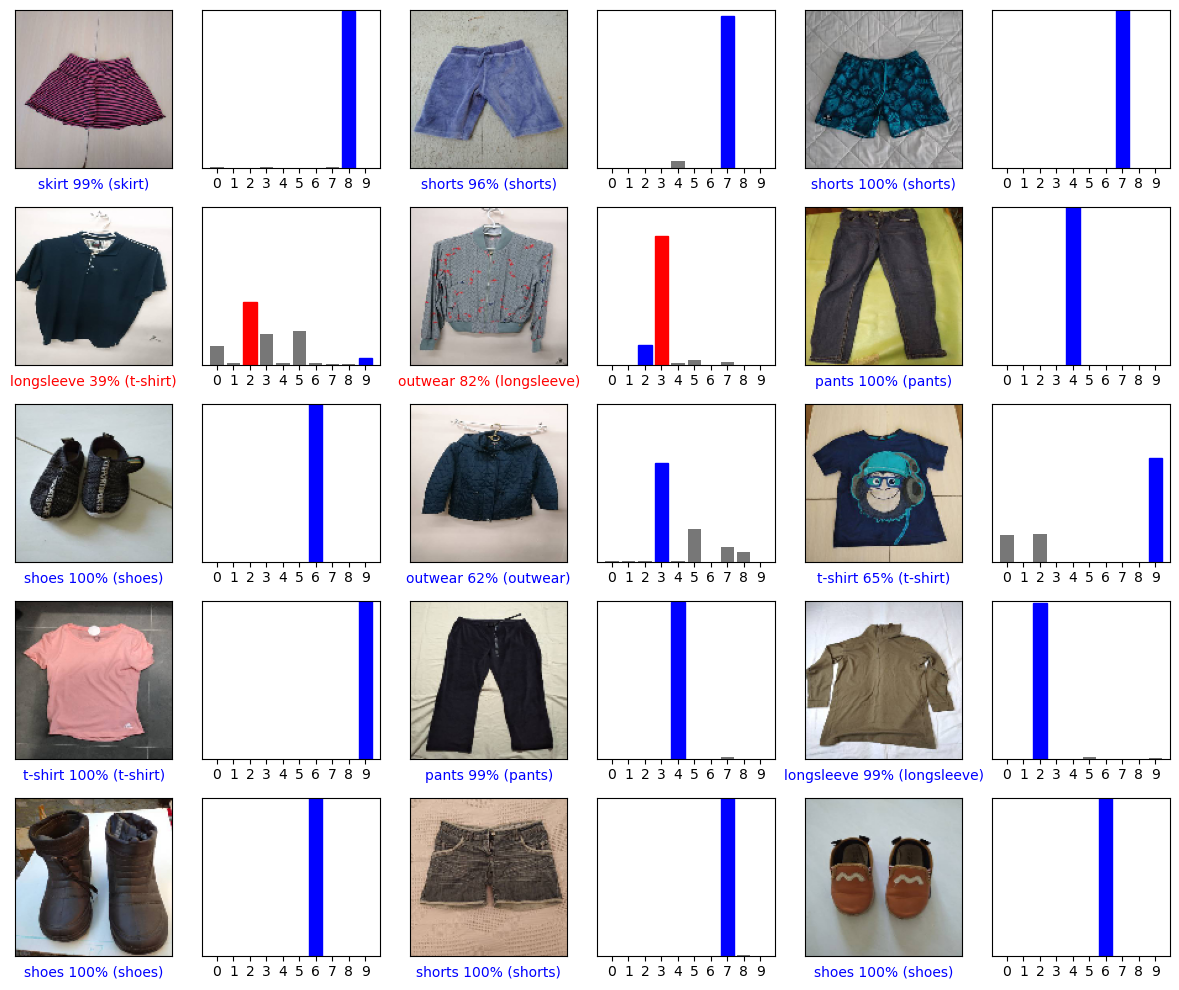

In [10]:
model_2 = tf.keras.models.load_model('EfficientNetV2L_001_2.h5')

model_evaluation(model_2)

12/12 - 25s - loss: 0.5371 - accuracy: 0.8737 - 25s/epoch - 2s/step
1/1 [==============================] - 8s 8s/step


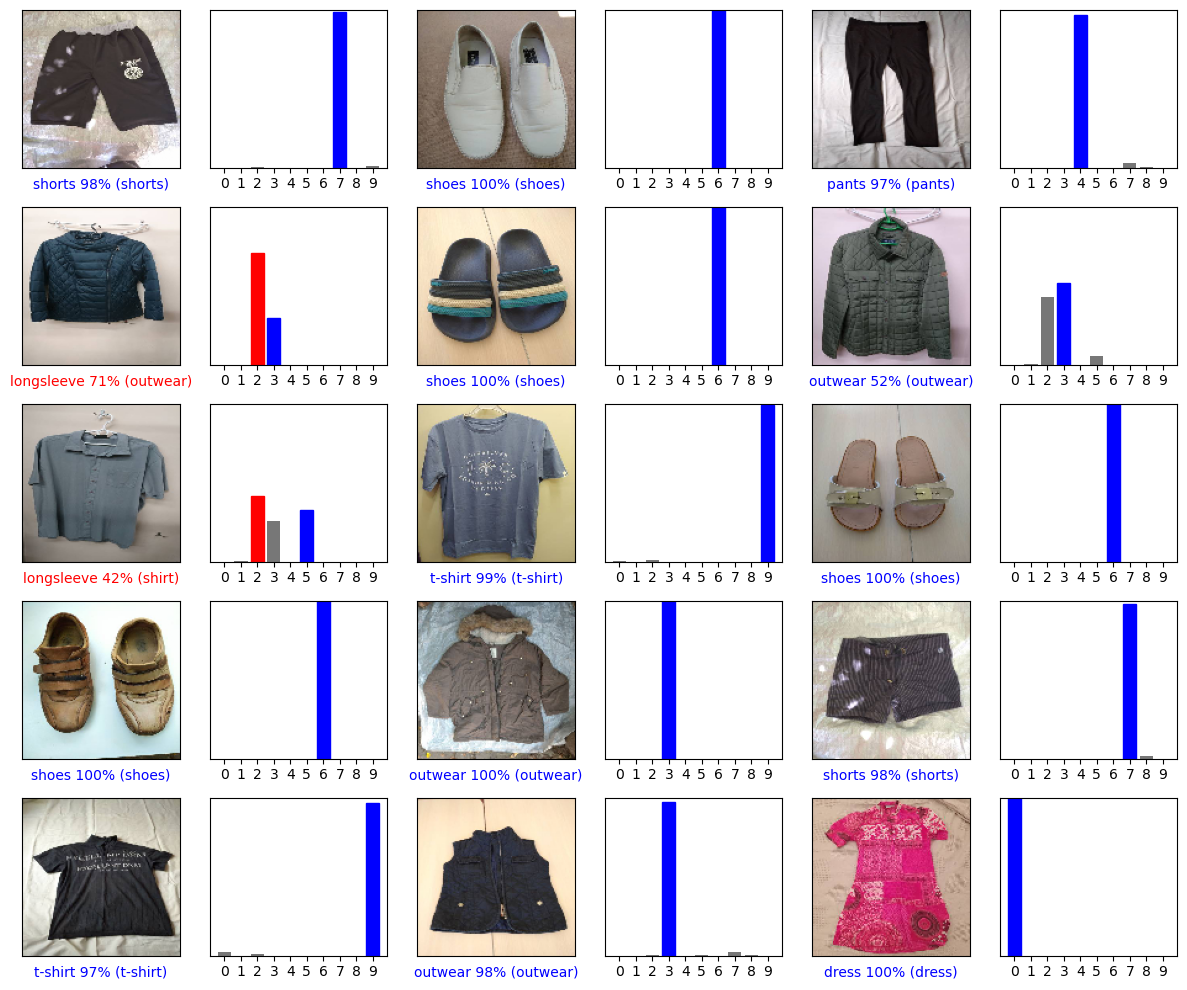

In [11]:
model_3 = tf.keras.models.load_model('EfficientNetV2L_001_3.h5')

model_evaluation(model_3)

12/12 - 26s - loss: 0.5214 - accuracy: 0.7957 - 26s/epoch - 2s/step
1/1 [==============================] - 8s 8s/step


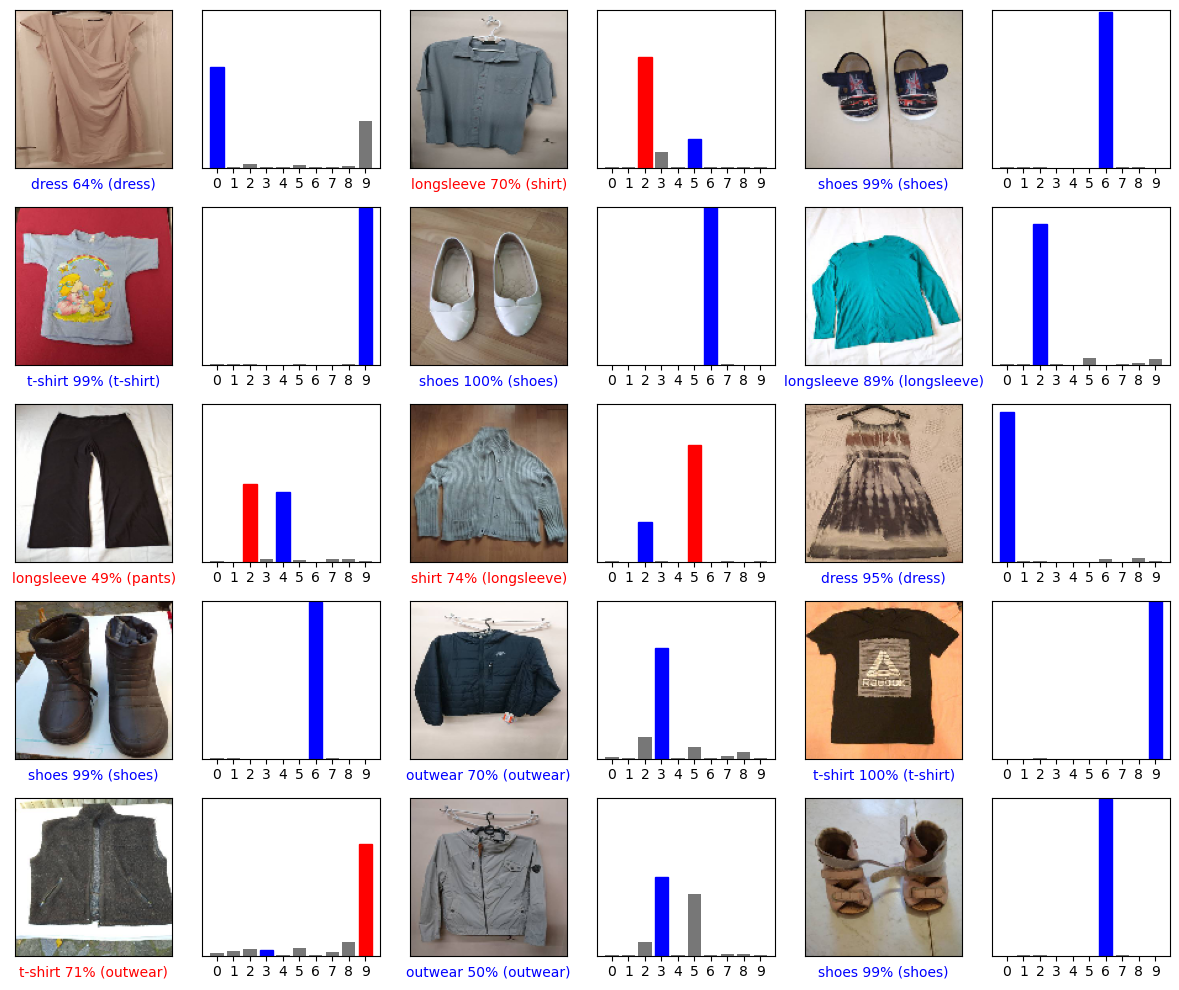

In [12]:
model_4 = tf.keras.models.load_model('EfficientNetV2L_03_0.812.h5')

model_evaluation(model_4)

12/12 - 27s - loss: 0.5202 - accuracy: 0.7957 - 27s/epoch - 2s/step
1/1 [==============================] - 7s 7s/step


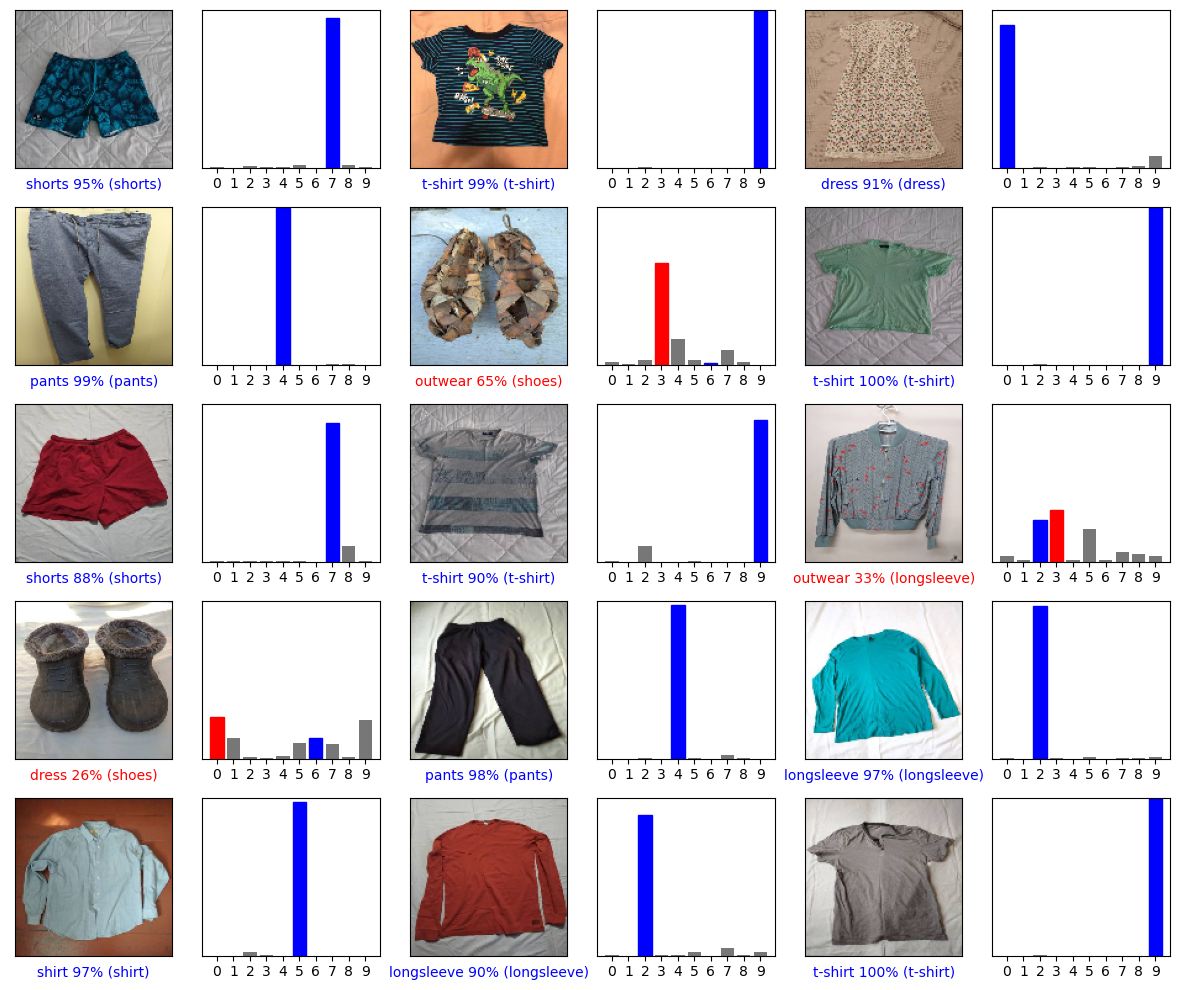

In [13]:
model_5 = tf.keras.models.load_model('EfficientNetV2L_04_0.818.h5')

model_evaluation(model_5)

12/12 - 24s - loss: 0.4896 - accuracy: 0.8065 - 24s/epoch - 2s/step
1/1 [==============================] - 9s 9s/step


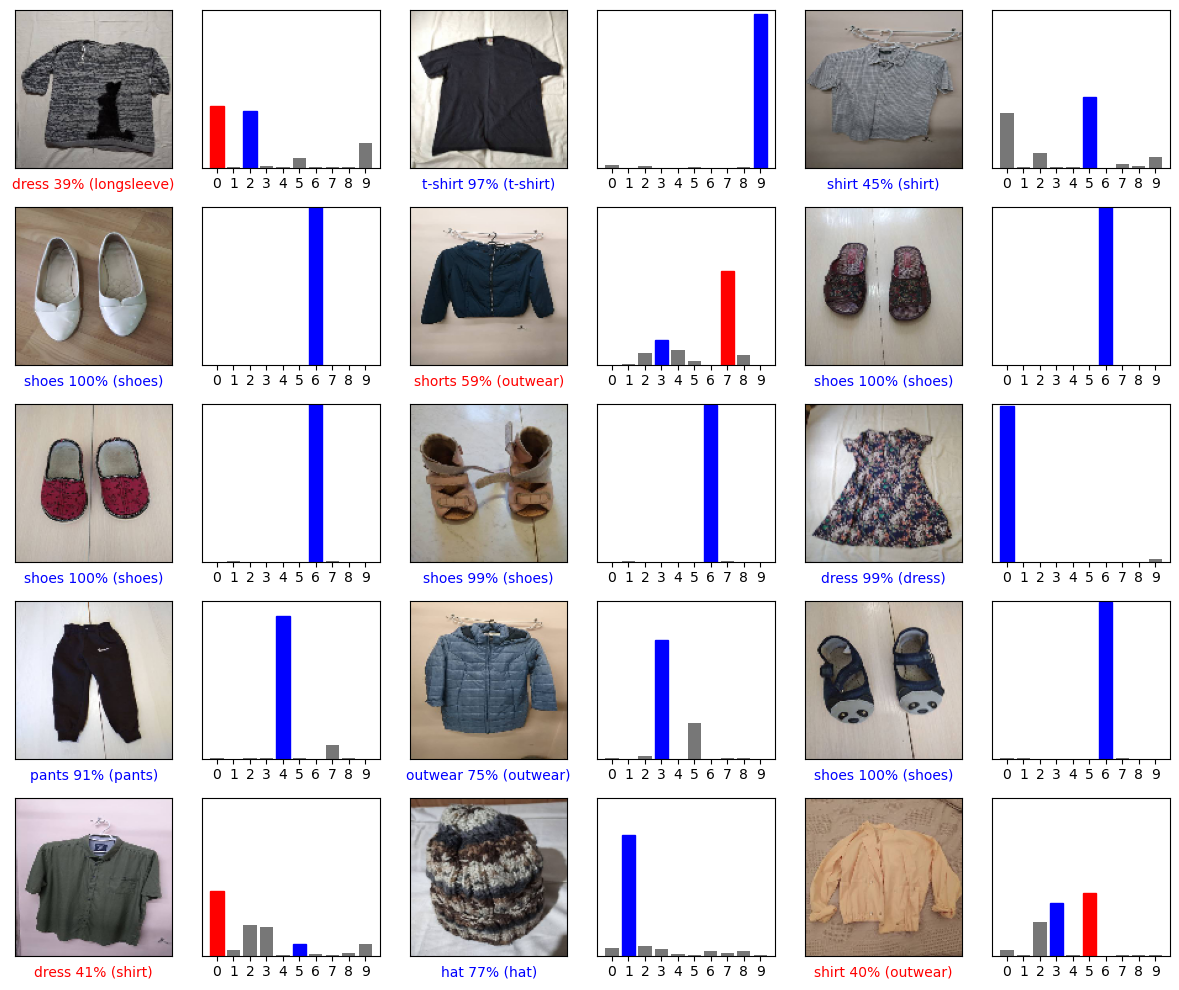

In [14]:
model_6 = tf.keras.models.load_model('EfficientNetV2L_05_0.856.h5')

model_evaluation(model_6)

12/12 - 27s - loss: 0.4756 - accuracy: 0.8172 - 27s/epoch - 2s/step
1/1 [==============================] - 9s 9s/step


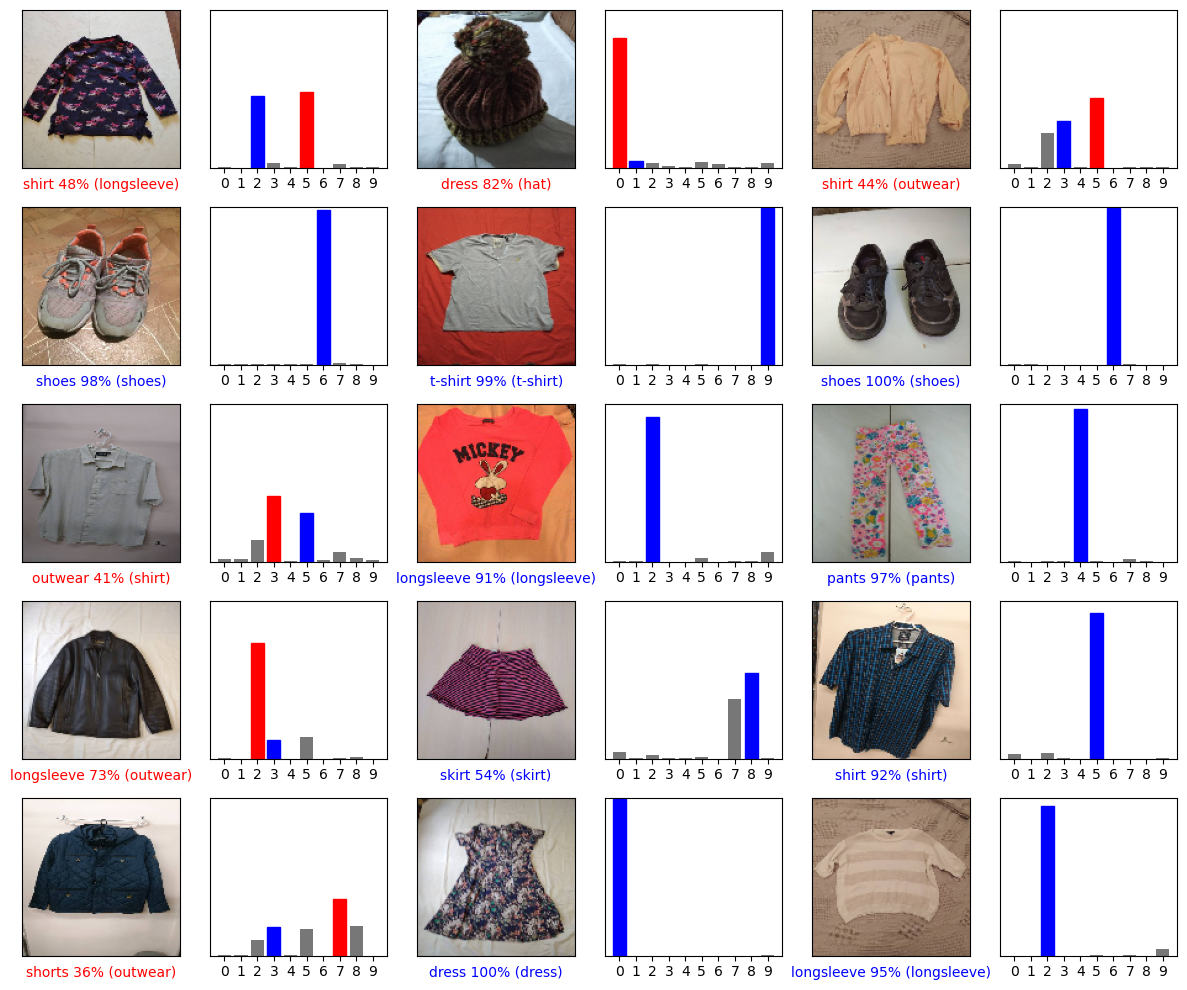

In [15]:
model_7 = tf.keras.models.load_model('EfficientNetV2L_06_0.862.h5')

model_evaluation(model_7)

We can see that the model EfficientNetV2L_001_3.h5 performed the best for the test data with an accuracy: 87.37%. The accuracy for training data was 94.49% and validation data was 87.1%. We can see that it perfomed better with the test data than the validation data.

Note: The data was not nicely balanced at the first place, but I wanted to used all of it, so there may be some overfitting, which we can see as there were many images classified as longsleeve even though they were classified as some other data(mostly outwear). Also, I could not use a larger model as there were hardware constraints. But, this performance was better than the 79.83% accuracy of the original project using the small model. Actually, this was pretty close to the accuracy of 90.32% of the larger model used in the project.